<a href="https://colab.research.google.com/github/aniruddh47/AIES_LAB/blob/main/AIES_ex_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name:-Aniruddh Kumbhar                                                                 
Class:- B.Tech B DIV                                                                  
PRN NO. 22SC114501079                                                                
Title:- Transparency in AI decision making

Columns:
 Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

Missing values:
 Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64
Decision Tree Accuracy: 0.8260869565217391
Random Forest Accuracy: 0.8695652173913043

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.86      0.80       112
           1       0.89      0.80      0.85       164

    accuracy                           0.83       276
   macro avg       0.82      0.83      0.82       276
weighted avg       0.83      0.83      0.83       276


Random Forest Classification Report:
              precision    recall 

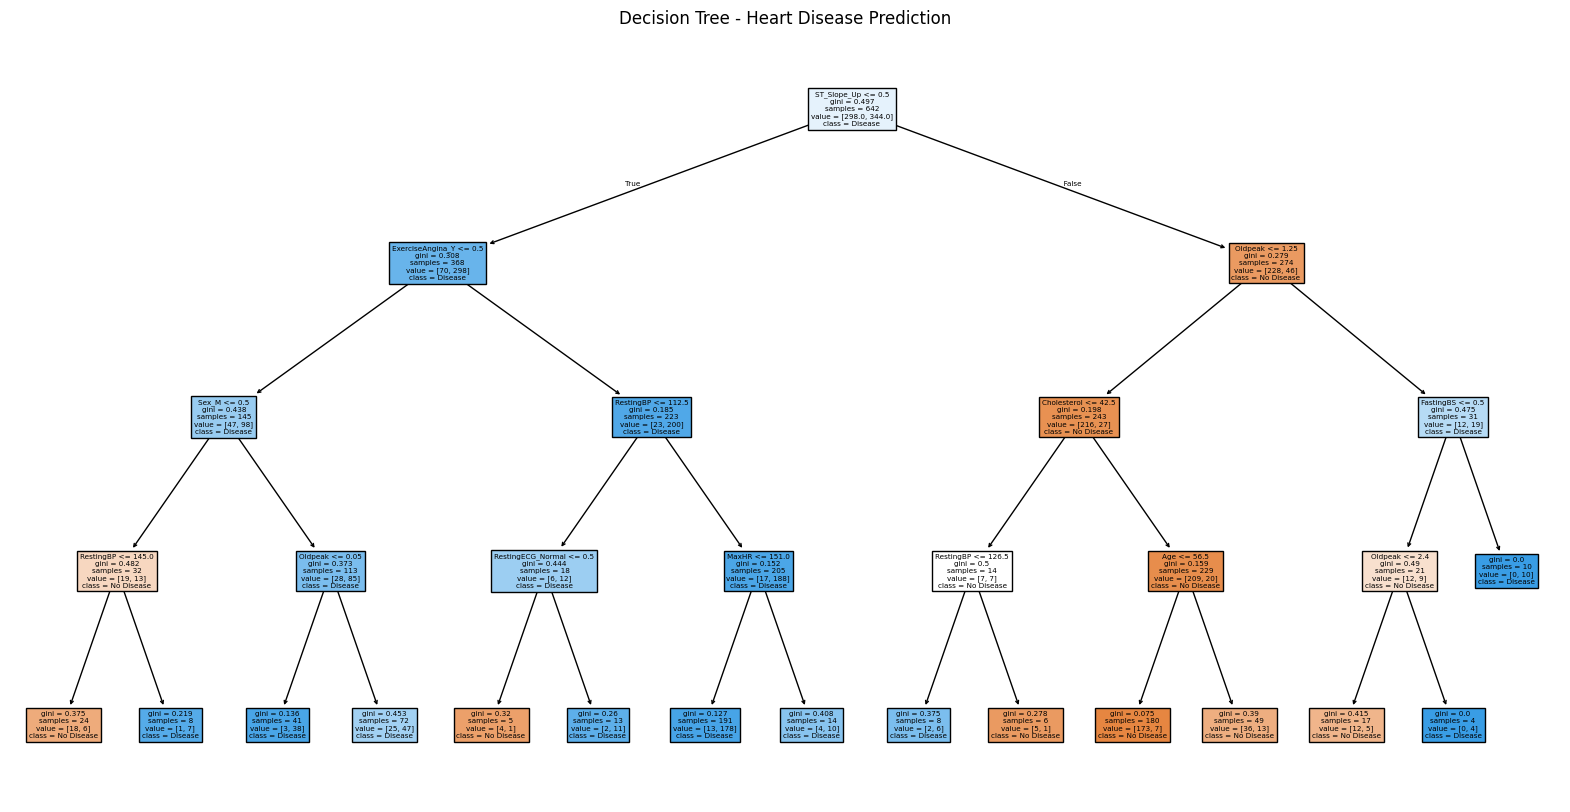

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Load the dataset
df = pd.read_csv("/content/heart.csv")  # Adjust the path if needed

# Step 2: Check column names and missing values
print("Columns:\n", df.columns)
print("\nMissing values:\n", df.isnull().sum())

# Step 3: One-hot encode categorical columns
df = pd.get_dummies(df, columns=["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"], drop_first=True)

# Step 4: Define features and target
X = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"]

# Step 5: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 6: Train Decision Tree
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

# Step 7: Train Random Forest
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)

# Step 8: Evaluation
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_forest))

print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_tree))

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_forest))

# Step 9: Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=X.columns, class_names=["No Disease", "Disease"], filled=True)
plt.title("Decision Tree - Heart Disease Prediction")
plt.show()
